<a href="https://colab.research.google.com/github/nishitgala89/ML_fromScratch/blob/main/LinearRegression_fromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

The Goal is to learn a linear model $\hat{y}$ that models $y$ given $X$. 

$\hat{y} = XW + b$
* $\hat{y}$ = predictions | $\in \mathbb{R}^{NX1}$ ($N$ is the number of samples)
* $X$ = inputs | $\in \mathbb{R}^{NXD}$ ($D$ is the number of features)
* $W$ = weights | $\in \mathbb{R}^{DX1}$ 
* $b$ = bias | $\in \mathbb{R}^{1}$ 

* **Objective:**  Use inputs $X$ to predict the output $\hat{y}$ using a linear model. The model will be a line of best fit that minimizes the distance between the predicted (model's output) and target (ground truth) values. Training data $(X, y)$ is used to train the model and learn the weights $W$ using gradient descent.
* **Advantages:**
  * Computationally simple.
  * Highly interpretable.
  * Can account for continuous and categorical features.
* **Disadvantages:**
  * The model will perform well only when the data is linearly separable (for classification).
  * Usually not used for classification and only for regression.
* **Miscellaneous:** You can also use linear regression for binary classification tasks where if the predicted continuous value is above a threshold, it belongs to a certain class. But we will cover better techniques for classification in future lessons and will focus on linear regression for continuous regression tasks only.


# Create Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
SEED = 42
SAMPLE_SIZE=200

# Set seed for numpy
np.random.seed(SEED)

In [3]:
# Generate Data

X = np.array(range(SAMPLE_SIZE))
noise = np.random.uniform(-10,20,size=SAMPLE_SIZE)
y = 2.5 * X + 4  + noise

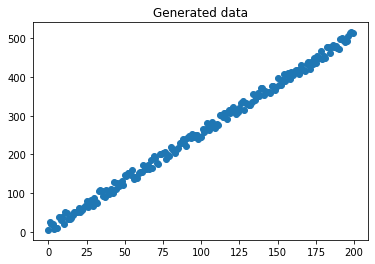

In [4]:
# Scatter plot
plt.title("Generated data")
plt.scatter(x=X, y=y)
plt.show()

In [5]:
# Stack Data as [X,y] in numpy array
data = np.vstack([X, y]).T

In [6]:
#Load data in Pandas Dataframe
df = pd.DataFrame(data, columns=["X", "y"])
X = df[["X"]].values
y = df[["y"]].values
df.head()

,X,y
0,0.0,5.236204
1,1.0,25.021429
2,2.0,20.959818
3,3.0,19.459755
4,4.0,8.680559


# Split Data into Training and Testing

In [7]:
TRAIN_SIZE = 0.8
TEST_SIZE = 0.2

In [8]:
#Shuffle Data
indices = list(range(SAMPLE_SIZE))
np.random.shuffle(indices)
np.array(indices)

array([ 78,  55, 171, 100,  63, 182,  30, 117, 191,  10,   9, 125,  79,
       131,  28,  70,  93, 167,  40, 189,  43, 195,   2,  71,  77, 106,
        97, 132,  95, 164,  82, 179, 184, 120,  33, 197,   0,  11, 153,
       119, 185, 140, 104, 154, 155, 177,  18,  88,  72, 102,  99,  90,
        58,  39,  54, 148, 121, 156,  73,  84, 136, 143, 149, 107,   4,
        68,  52,  91, 196, 129,  87,  69, 170,  51, 174,  76,  80, 194,
        61, 192, 128, 101, 161,  62, 122, 166,  14,  86,  75,  13,  15,
       180,  64,  19,  44,  35,  56,   6,  59,  12, 124, 130,  49, 172,
        25,  41, 138,  38, 199,  42,   8, 181, 126, 150,  89,   1, 105,
       158,  65,  22,  85,  46,  31, 113, 139, 137, 193, 133,  57, 183,
        24,  17, 169,  66, 198, 142,  94, 187, 188,  23,  36, 123, 190,
         5, 116,  45,  16,  48,  34,   3, 146, 175,  60, 110,  27,  96,
        29, 176, 159,  26,   7,  50, 108,  37, 157,  21, 118, 114, 178,
       173, 144, 134, 135, 186, 147,  47,  20, 141,  32,  67, 16

In [9]:
X = X[indices]
y = y[indices]

In [10]:
X_train = X[0:int(SAMPLE_SIZE * TRAIN_SIZE)]
y_train = y[0:int(SAMPLE_SIZE * TRAIN_SIZE)]

X_test = X[int(SAMPLE_SIZE * TRAIN_SIZE):]
y_test = y[int(SAMPLE_SIZE * TRAIN_SIZE):]

X_train.shape, y_train.shape, X_test.shape,y_test.shape

((160, 1), (160, 1), (40, 1), (40, 1))

In [11]:
np.array(y_train)

array([[199.75397186],
       [159.15622705],
       [421.99763487],
       [244.94287557],
       [162.2025998 ],
       [476.74080855],
       [ 87.22634556],
       [292.09710177],
       [498.41647274],
       [ 19.61753483],
       [ 37.74217733],
       [319.31323366],
       [194.97607179],
       [328.16323431],
       [ 81.77243707],
       [192.16734308],
       [243.33831593],
       [417.09555531],
       [ 97.66114705],
       [473.75556873],
       [128.77961206],
       [491.97628724],
       [ 20.95981825],
       [177.46147045],
       [188.72133955],
       [271.31148769],
       [249.32623055],
       [327.59596102],
       [246.31386789],
       [406.7086931 ],
       [208.92694075],
       [445.62562832],
       [461.73824883],
       [318.22320465],
       [104.96656612],
       [513.4133078 ],
       [  5.23620357],
       [ 50.59729556],
       [391.18358281],
       [307.68026726],
       [476.29952138],
       [372.87341885],
       [281.22699422],
       [408

# Standardize the values

We need to standardize our data (zero mean and unit variance) so a specific feature's magnitude doesn't affect how the model learns its weights.

$z = \frac{x_i - \mu}{\sigma}$
* $z$ = standardized value
* $x_i$ = inputs
* $\mu$ = mean
* $\sigma$ = standard deviation

In [12]:
# The mean, standard deviation will be calculated for the training data and applied to both training and testing data
# The reason is that test data should be kept unseen to avoid the biasing of the trianing process

X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

In [13]:
def standardize_data(data, mean, std):
    return (data - mean)/std

In [14]:
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)

X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)

In [15]:
X_train[1:3]

array([[-0.70031987],
       [ 1.25132229]])

In [16]:
# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_train):.1f}, std: {np.std(X_train):.1f}")
print (f"mean: {np.mean(y_train):.1f}, std: {np.std(y_train):.1f}")

mean: -0.0, std: 1.0
mean: 0.0, std: 1.0


In [17]:
print (f"mean: {np.mean(X_test):.1f}, std: {np.std(X_test):.1f}")
print (f"mean: {np.mean(y_test):.1f}, std: {np.std(y_test):.1f}")

mean: 0.2, std: 0.8
mean: 0.2, std: 0.8


#Weight Initialization

Our goal is to learn a linear model $\hat{y}$ that models $y$ given $X$. 

$\hat{y} = XW + b$
* $\hat{y}$ = predictions | $\in \mathbb{R}^{NX1}$ ($N$ is the number of samples)
* $X$ = inputs | $\in \mathbb{R}^{NXD}$ ($D$ is the number of features)
* $W$ = weights | $\in \mathbb{R}^{DX1}$ 
* $b$ = bias | $\in \mathbb{R}^{1}$ 

1. Randomly initialize the model's weights $W$.

In [18]:
# Random Weights
W = 0.0105 * np.random.randn(1,1)
b = np.zeros((1,1))
print(W), print(b)

[[1.90429175e-05]]
[[0.]]


(None, None)

#Model

2. Feed inputs $X$ into the model to receive the predictions $\hat{y}$.
  * $\hat{y} = XW + b$

In [19]:
# Forward pass [NX1] · [1X1] = [NX1]
y_hat = np.dot(X_train, W) + b
print (f"y_pred: {y_hat.shape}")

y_pred: (160, 1)


#Loss

3. Compare the predictions $\hat{y}$ with the actual target values $y$ using the objective (cost) function to determine the loss $J$. A common objective function for linear regression is mean squarred error (MSE). This function calculates the difference between the predicted and target values and squares it.

  * $J(\theta) = MSE = \frac{1}{N} \sum_{i-1}^{N} (y_i - \hat{y}_i)^2 $
    * ${y}$ = ground truth | $\in \mathbb{R}^{NX1}$
    * $\hat{y}$ = predictions | $\in \mathbb{R}^{NX1}$

In [20]:
N = len(y_train)
loss = (1/N) * np.sum((y_train - y_hat)**2)
print (f"loss: {loss:.2f}")

loss: 1.00


#Gradients

4. Calculate the gradient of loss $J(\theta)$ w.r.t to the model weights.
  * $J(\theta) = \frac{1}{N} \sum_i (y_i - \hat{y}_i)^2  = \frac{1}{N}\sum_i (y_i - X_iW)^2 $
    * $\frac{\partial{J}}{\partial{W}} = -\frac{2}{N} \sum_i (y_i - X_iW) X_i = -\frac{2}{N} \sum_i (y_i - \hat{y}_i) X_i$
    * $\frac{\partial{J}}{\partial{b}} = -\frac{2}{N} \sum_i (y_i - X_iW)1 = -\frac{2}{N} \sum_i (y_i - \hat{y}_i)1$

In [21]:
# Backward propagation
dW = -(2/N) * np.sum((y_train - y_hat) * X_train)
db = -(2/N) * np.sum((y_train - y_hat) * 1)

dW, db

(-1.9966809200814866, -1.332267629550188e-16)

> The gradient is the derivative, or the rate of change of a function. It's a vector that points in the direction of greatest increase of a function. For example the gradient of our loss function ($J$) with respect to our weights ($W$) will tell us how to change W so we can maximize $J$. However, we want to minimize our loss so we subtract the gradient from $W$. 

# Update weights

5. Update the weights $W$ using a small learning rate $\alpha$.
  * $W = W - \alpha\frac{\partial{J}}{\partial{W}}$
  * $b = b - \alpha\frac{\partial{J}}{\partial{b}}$

In [22]:
alpha = 0.01 # learning rate

W += W - alpha * dW
b += b - alpha *db

> The learning rate $\alpha$ is a way to control how much we update the weights by. If we choose a small learning rate, it may take a long time for our model to train. However, if we choose a large learning rate, we may overshoot and our training will never converge. The specific learning rate depends on our data and the type of models we use but it's typically good to explore in the range of $[1e^{-8}, 1e^{-1}]$. We'll explore learning rate update strategies in later lessons.

#Training

6. Repeat steps 3 - 5 to minimize the loss and train the model.

In [23]:
EPOCHS = 250
alpha = 0.005 # learning rate

In [24]:
for epoch in range(1,EPOCHS + 1):
  y_hat = np.dot(X_train, W) + b

  loss = (1/N) * np.sum((y_train - y_hat)**2)

  dW = -(2/N) * np.sum((y_train - y_hat) * X_train)
  db = -(2/N) * np.sum((y_train - y_hat) * 1)

  W += - alpha * dW
  b += - alpha *db

  if epoch % 10 == 0:
        print (f"Epoch: {epoch}, loss: {loss:.3f}")


Epoch: 10, loss: 0.802
Epoch: 20, loss: 0.657
Epoch: 30, loss: 0.538
Epoch: 40, loss: 0.440
Epoch: 50, loss: 0.361
Epoch: 60, loss: 0.296
Epoch: 70, loss: 0.242
Epoch: 80, loss: 0.199
Epoch: 90, loss: 0.163
Epoch: 100, loss: 0.134
Epoch: 110, loss: 0.110
Epoch: 120, loss: 0.091
Epoch: 130, loss: 0.075
Epoch: 140, loss: 0.062
Epoch: 150, loss: 0.051
Epoch: 160, loss: 0.042
Epoch: 170, loss: 0.035
Epoch: 180, loss: 0.029
Epoch: 190, loss: 0.025
Epoch: 200, loss: 0.021
Epoch: 210, loss: 0.018
Epoch: 220, loss: 0.015
Epoch: 230, loss: 0.013
Epoch: 240, loss: 0.011
Epoch: 250, loss: 0.010


#Evaluation

In [25]:
pred_train = W*X_train + b
pred_test = W*X_test + b

In [26]:
# Train and test MSE
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print (f"train_MSE: {train_mse:.2f}, test_MSE: {test_mse:.2f}")

train_MSE: 0.01, test_MSE: 0.01


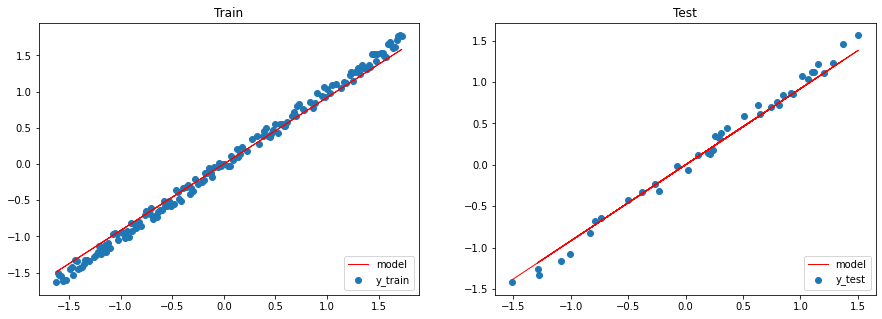

In [27]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Show plots
plt.show()

Since we standardized our inputs and outputs, our weights were fit to those standardized values. So we need to unstandardize our weights so we can compare it to our true weight (3.5).

Note that both X and y were standardized.

$\hat{y}_{scaled} = b_{scaled} + \sum_{j=1}^{k}W_{j}x_{{scaled}_j}$
* $y_{scaled} = \frac{\hat{y}_{unscaled} - \bar{y}}{\sigma_y}$
* $x_{scaled} = \frac{x_j - \bar{x}_j}{\sigma_j}$

$\frac{\hat{y} - \bar{y}}{\sigma_y} = b_{scaled} + \sum_{j=1}^{k}W_{j}\frac{x_j - \bar{x}_j}{\sigma_j}$

$ \hat{y}_{scaled} = \frac{\hat{y}_{unscaled} - \bar{y}}{\sigma_y} = {b_{scaled}} + \sum_{j=1}^{k} {W}_{j} (\frac{x_j - \bar{x}_j}{\sigma_j}) $

$\hat{y}_{unscaled} = b_{scaled}\sigma_y + \bar{y} - \sum_{j=1}^{k} {W}_{j}(\frac{\sigma_y}{\sigma_j})\bar{x}_j + \sum_{j=1}^{k}{W}_{j}(\frac{\sigma_y}{\sigma_j})x_j $

In the expression above, we can see the expression $\hat{y}_{unscaled} = W_{unscaled}x + b_{unscaled} $ where

* $W_{unscaled} = \sum_{j=1}^{k}{W}_j(\frac{\sigma_y}{\sigma_j}) $

* $b_{unscaled} = b_{scaled}\sigma_y + \bar{y} - \sum_{j=1}^{k} {W}_j(\frac{\sigma_y}{\sigma_j})\bar{x}_j$

In [28]:
# Unscaled weights
W_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mean - np.sum(W_unscaled*X_mean)
print ("[actual] y = 2.5X + 4 + noise")
print (f"[model] y_hat = {W_unscaled[0][0]:.3f}X + {b_unscaled[0][0]:.3f}") 

[actual] y = 2.5X + 4 + noise
[model] y_hat = 2.312X + 26.515


In [29]:
W_unscaled[0][0], b_unscaled[0][0]

(2.312150981546769, 26.51509750752504)